1.IMPORT DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               770 non-null    float64
 1   Glucose                   770 non-null    float64
 2   BloodPressure             770 non-null    float64
 3   SkinThickness             769 non-null    float64
 4   Insulin                   769 non-null    float64
 5   BMI                       770 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       770 non-null    float64
 8   Outcome                   769 non-null    float64
dtypes: float64(9)
memory usage: 54.3 KB


2. DATA PREPROCESSING

In [5]:
df=df.drop_duplicates() # drop duplicates

In [6]:
df=df.dropna() # drop null values

In [7]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [8]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

<AxesSubplot:xlabel='Outcome', ylabel='count'>

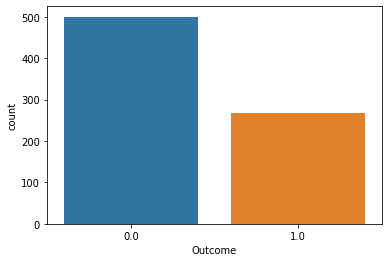

In [9]:
sns.countplot('Outcome',data=df)

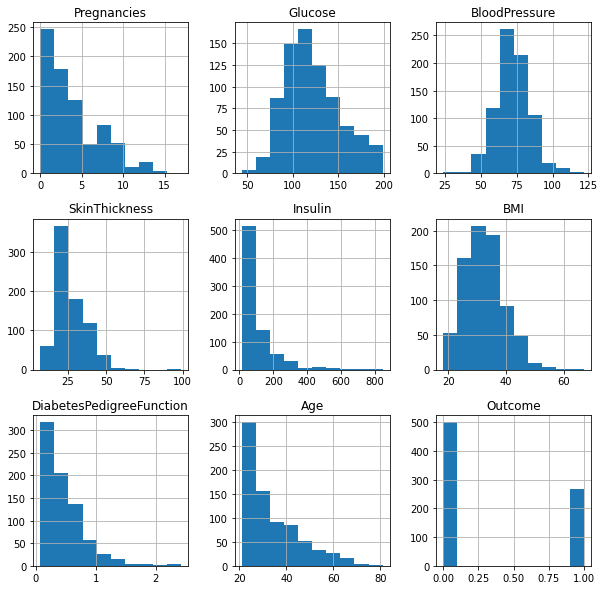

In [10]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

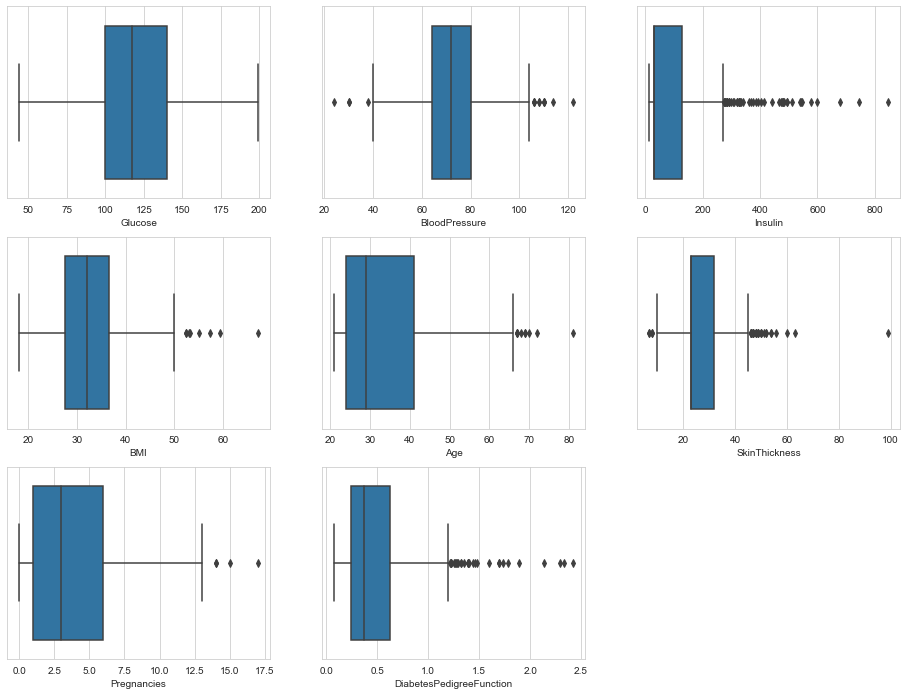

In [11]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

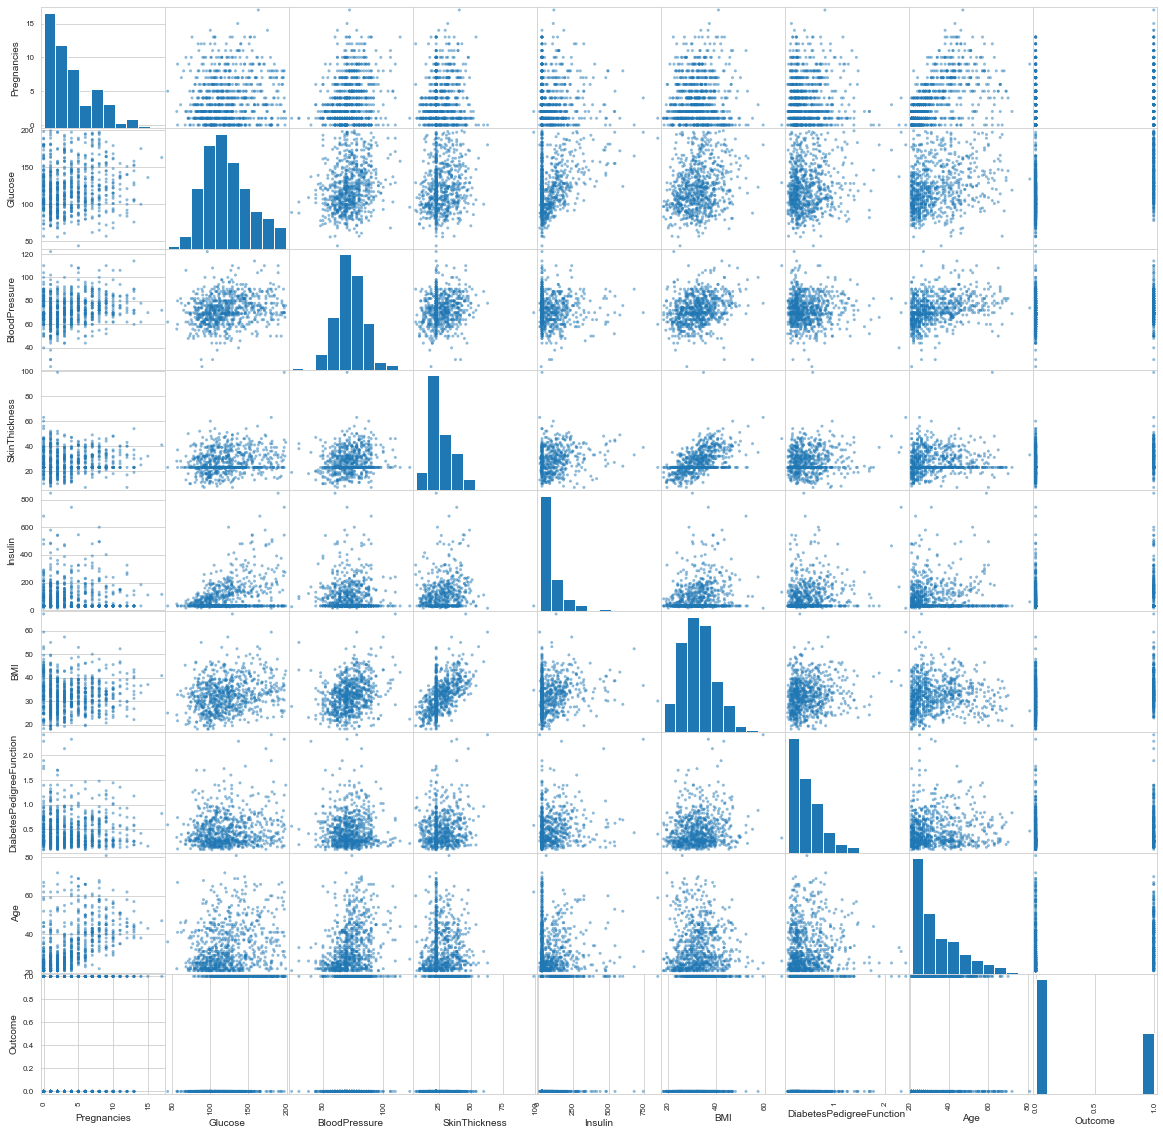

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  if you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number of pregnancies have lower insulin

3. FEATURE SELECTION

<AxesSubplot:>

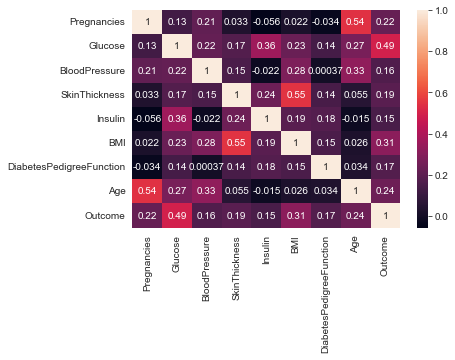

In [13]:
#only look outcome 
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [14]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')
df_selected.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6.0,148.0,35.0,33.6,50.0,1.0
1,1.0,85.0,29.0,26.6,31.0,0.0
2,8.0,183.0,23.0,23.3,32.0,1.0
3,1.0,89.0,23.0,28.1,21.0,0.0
4,0.0,137.0,35.0,43.1,33.0,1.0


4. HANDLING OUTLIERS

In [15]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<AxesSubplot:xlabel='SkinThickness'>

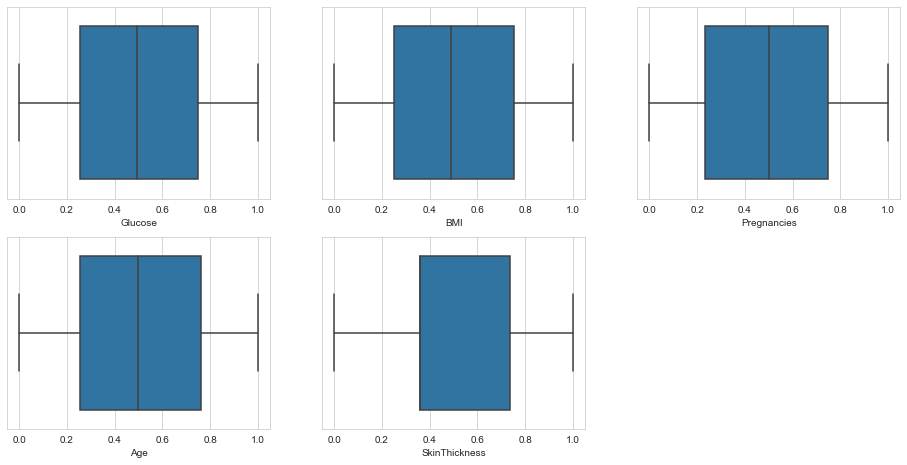

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

5. SPLIT DATA INTO X AND Y

In [17]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [18]:
X.head() # contains only independent features 

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [19]:
y.head() #contains dependent feature

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

6. SPLIT TRAIN TEST

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [21]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [22]:
X_test.shape,y_test.shape

((154, 5), (154,))

7. NAIVE BAYES MODEL

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [24]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [25]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 Accuracy score is:
 0.7662337662337663

 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



Text(34.0, 0.5, 'Actual')

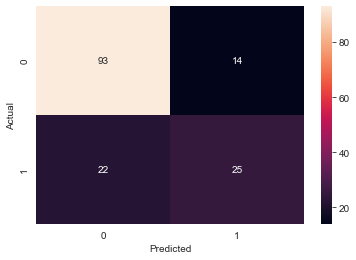

In [26]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))

print("\n Accuracy score is:\n",accuracy_score(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))

print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True, fmt='g')
sns.set(font_scale=1.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")



8. SUPPORT VECTOR MACHINE MODEL

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search2 = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

grid_result = grid_search2.fit(X, y)

In [28]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 Accuracy score is:
 0.8246753246753247

 F1:
 0.7032967032967034

 Precision score is:
 0.7272727272727273

 Recall score is:
 0.6808510638297872

 Confusion Matrix:



Text(25.5, 0.5, 'Actual')

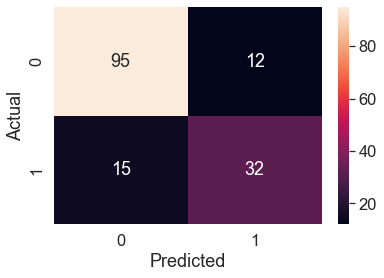

In [29]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))

print("\n Accuracy score is:\n",accuracy_score(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,svm_pred))
print("\n Precision score is:\n",precision_score(y_test,svm_pred))
print("\n Recall score is:\n",recall_score(y_test,svm_pred))

print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True, fmt='g')
sns.set(font_scale=1.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")

9. DECISION TREE MODEL

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [31]:
best_model=grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [32]:
dt_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 Accuracy score is:
 0.7922077922077922

 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



Text(25.5, 0.5, 'Actual')

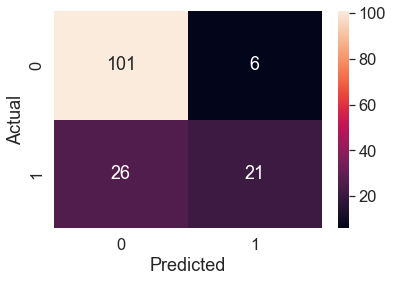

In [33]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))

print("\n Accuracy score is:\n",accuracy_score(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))

print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True, fmt='g')
sns.set(font_scale=1.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")

10. ROC CURVE

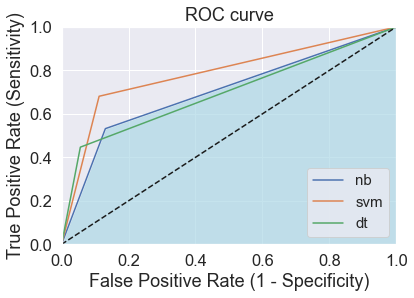

In [34]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects false positive rate(fpr), true positive rate(tpr), thresholds
from sklearn import metrics

fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_test, nb_pred)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test, svm_pred)
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, dt_pred)

#area under roc curve
plt.fill_between(fpr_nb, tpr_nb, facecolor='lightblue', alpha=0.7)

plt.plot(fpr_nb, tpr_nb, label="nb")
plt.plot(fpr_svm, tpr_svm, label="svm")
plt.plot(fpr_dt, tpr_dt, label="dt")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=15)
plt.grid(True)
sns.set(font_scale=1)
plt.plot([0,1],[0,1],'k--')

11. AUC


 Naive Bayes :
 0.7005368860608471

 Support Vector Machine:
 0.7843507655597535

 Decision Tree:
 0.6953668721415789


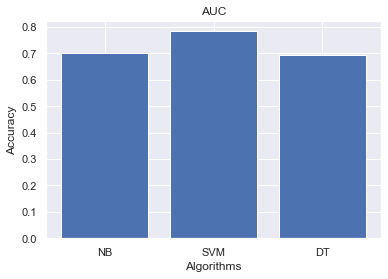

In [35]:
#Area under ROC curve = AUC
from sklearn.metrics import roc_auc_score
roc_score_nb = roc_auc_score(y_test, nb_pred)
roc_score_svm = roc_auc_score(y_test, svm_pred)
roc_score_dt = roc_auc_score(y_test, dt_pred)
print("\n Naive Bayes :\n",roc_score_nb)
print("\n Support Vector Machine:\n",roc_score_svm)
print("\n Decision Tree:\n",roc_score_dt)

plt.title('AUC')
plt.bar(['NB','SVM','DT'],[roc_score_nb,roc_score_svm,roc_score_dt])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

12. PREDICTION ACCURACY GRAPH

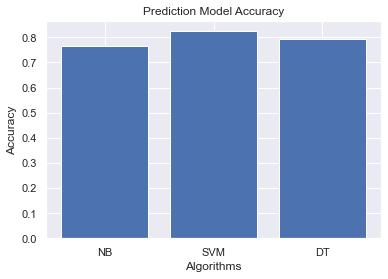

In [36]:
plt.title('Prediction Model Accuracy')
plt.bar(['NB','SVM','DT'],[accuracy_score(y_test,nb_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,dt_pred)])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

13. PREDICTION MODEL COMPARISON TABLE

In [37]:
import pandas as pd

# Create a dataframe
data = {'algorithm': ['NB', 'SVM', 'DT'],
         'accuracy': [accuracy_score(y_test,nb_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,dt_pred)],
           'recall': [recall_score(y_test,nb_pred),recall_score(y_test,svm_pred),recall_score(y_test,dt_pred)],
        'precision': [precision_score(y_test,nb_pred),precision_score(y_test,svm_pred),precision_score(y_test,dt_pred)],
         'f1-score': [f1_score(y_test,nb_pred),f1_score(y_test,svm_pred),f1_score(y_test,dt_pred)],
              'AUC': [roc_score_nb,roc_score_svm,roc_score_dt],
       }
table = pd.DataFrame(data)

# Print the table
print(table)

  algorithm  accuracy    recall  precision  f1-score       AUC
0        NB  0.766234  0.531915   0.641026  0.581395  0.700537
1       SVM  0.824675  0.680851   0.727273  0.703297  0.784351
2        DT  0.792208  0.446809   0.777778  0.567568  0.695367


14. PREDICTION TEST

In [46]:
def predict_diabetes(attributes):
    prediction = nbModel_grid.predict([attributes])[0]
    if prediction == 1:
        return "Yes"
    else:
        return "No"

def predict_diabetes(attributes):
    prediction2 = grid_search2.predict([attributes])[0]
    if prediction2 == 1:
        return "Yes"
    else:
        return "No"
    
def predict_diabetes(attributes):
    prediction3 = grid_search.predict([attributes])[0]
    if prediction3 == 1:
        return "Yes"
    else:
        return "No"

In [48]:
# test the prediction function with sample data
sample_data = [0.747718,0.810300,0.801825,0.591265,0.889831]
prediction = predict_diabetes(sample_data)
print("Prediction Naive Bayes:", prediction)
prediction2 = predict_diabetes(sample_data)
print("Prediction Support Vector Machine:", prediction2)
prediction3 = predict_diabetes(sample_data)
print("Prediction Decision Tree:", prediction3)

Prediction Naive Bayes: Yes
Prediction Support Vector Machine: Yes
Prediction Decision Tree: Yes
